In [73]:
import pandas as pd
import numpy as np

Setup

In [74]:
df = pd.read_csv('cleaned_data.csv')

/var/folders/bc/_mksvg913475jdkwl9xxysdc0000gn/T/ipykernel_38079/1139031434.py:1: DtypeWarning:

Columns (48,178,179,217,218,219,221,223,225,239,240,241,242,243,244,247,248,252,253,254,259,261,262,383,384,385,386,387,388,389) have mixed types. Specify dtype option on import or set low_memory=False.



# Define Features

In [75]:
X = ['posteam_home',
     'under_two_minute_warning',
     'season_postseason',
     'week',
     'quarter_seconds_remaining',
     'half_seconds_remaining',
     'game_seconds_remaining',
     'offense_drive_number',
     'qtr',
     'down',
     'posteam_timeouts_remaining',
     'defteam_timeouts_remaining',
     'posteam_score',
     'defteam_score',
     'score_differential',
     'is_throwaway_or_spike',
     'is_batted_pass',
     # 'is_screen_like',

    #In-Game Counts
     'punt_blocked_so_far', 'first_down_rush_so_far', 'first_down_pass_so_far', 'first_down_penalty_so_far', 'third_down_converted_so_far', 'third_down_failed_so_far', 'fourth_down_converted_so_far', 'fourth_down_failed_so_far', 'incomplete_pass_so_far', 'touchback_so_far', 'punt_inside_twenty_so_far', 'punt_in_endzone_so_far', 'punt_out_of_bounds_so_far', 'punt_downed_so_far', 'punt_fair_catch_so_far', 'interception_so_far', 'fumble_forced_so_far', 'fumble_not_forced_so_far', 'fumble_out_of_bounds_so_far', 'fumble_lost_so_far', 'fumble_so_far', 'solo_tackle_so_far', 'assist_tackle_so_far', 'tackled_for_loss_so_far', 'qb_hit_so_far', 'sack_so_far', 'penalty_so_far', 'touchdown_so_far', 'pass_touchdown_so_far', 'rush_touchdown_so_far', 'return_touchdown_so_far', 'extra_point_attempt_so_far', 'two_point_attempt_so_far', 'field_goal_attempt_so_far', 'kickoff_attempt_so_far', 'punt_attempt_so_far', 'rush_attempt_so_far', 'pass_attempt_so_far', 'complete_pass_so_far', 'lateral_reception_so_far', 'lateral_rush_so_far', 'safety_so_far', 'return_yards_so_far', 'penalty_yards_so_far',

    #In-Game Rates
     'completion_rate_so_far',
     'pass_rate_so_far',

     'season',
     'tod_hour',
     'tod_minute',
     'tod_weekday',
     'tod_is_weekend',
     'tod_is_night',
     'tod_sec_midnight',
     'tod_sin_time',
     'tod_cos_time',
     'tod_month',
     'tod_unix',
     'is_precip',
     'is_windy',
     'is_clear',
     'drive_play_index',
     'temp',
     'wind',
     'defenders_in_box',
     'number_of_pass_rushers',

     #Things of Interest- Post-Snap Indicators
     'time_to_throw',
     'yards_after_catch',
     'was_pressure',
     'air_yards_for_model',

     #Dummies
     'pass_location_left', 'pass_location_middle', 'pass_location_right', 'game_half_Half1', 'game_half_Half2', 'game_half_Overtime', 'roof_closed', 'roof_dome', 'roof_open', 'roof_outdoors', 'surface_a_turf', 'surface_astroturf', 'surface_fieldturf', 'surface_grass', 'surface_matrixturf', 'surface_sportturf', 'offense_formation_EMPTY', 'offense_formation_I_FORM', 'offense_formation_JUMBO', 'offense_formation_PISTOL', 'offense_formation_SHOTGUN', 'offense_formation_SINGLEBACK', 'offense_formation_UNDER CENTER', 'offense_formation_WILDCAT', 'route_ANGLE', 'route_CORNER', 'route_CROSS', 'route_DEEP OUT', 'route_FLAT', 'route_GO', 'route_HITCH', 'route_HITCH/CURL', 'route_IN', 'route_IN/DIG', 'route_OUT', 'route_POST', 'route_QUICK OUT', 'route_SCREEN', 'route_SHALLOW CROSS/DRAG', 'route_SLANT', 'route_SWING', 'route_TEXAS/ANGLE', 'route_WHEEL', 'defense_man_zone_type_MAN_COVERAGE', 'defense_man_zone_type_ZONE_COVERAGE', 'defense_coverage_type_2_MAN', 'defense_coverage_type_BLOWN', 'defense_coverage_type_COMBO', 'defense_coverage_type_COVER_0', 'defense_coverage_type_COVER_1', 'defense_coverage_type_COVER_2', 'defense_coverage_type_COVER_3', 'defense_coverage_type_COVER_4', 'defense_coverage_type_COVER_6', 'defense_coverage_type_COVER_9', 'defense_coverage_type_PREVENT']

y = 'success_outcome'

In [76]:
X_data = df[X].copy()

# Missing Data and Recodes

In [77]:
df['was_pressure'] = (
    df['was_pressure']
    .replace({True: 1, False: 0, 'True': 1, 'False': 0})
    .astype(float)
)

df['was_pressure'].value_counts()

0.0    41358
1.0    14033
Name: was_pressure, dtype: int64

In [78]:
missing = X_data.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0])

temp                      0.484456
wind                      0.484456
yards_after_catch         0.337559
completion_rate_so_far    0.028997
pass_rate_so_far          0.013813
time_to_throw             0.006113
was_pressure              0.001136
number_of_pass_rushers    0.000234
dtype: float64


In [79]:
df['wind'] = df['wind'].fillna(0)
df['temp'] = df['temp'].fillna(df['temp'].median())
X_data = df[X].copy()
missing = X_data.isnull().mean().sort_values(ascending=False)
print(missing[missing > 0])

yards_after_catch         0.337559
completion_rate_so_far    0.028997
pass_rate_so_far          0.013813
time_to_throw             0.006113
was_pressure              0.001136
number_of_pass_rushers    0.000234
dtype: float64


In [80]:
from sklearn.impute import SimpleImputer
cols_to_impute = [
    'yards_after_catch', 'completion_rate_so_far', 'pass_rate_so_far',
    'time_to_throw', 'was_pressure', 'number_of_pass_rushers'
]

# 1. Add missing indicators
for col in cols_to_impute:
    df[f"{col}_missing"] = df[col].isna().astype(int)

# 2. Impute numeric features
imputer = SimpleImputer(strategy='median')
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# Create the missing indicators list
missing_indicators = [f"{col}_missing" for col in cols_to_impute]

# Update X (assuming you already have it defined from earlier)
X = X + missing_indicators

In [81]:
print(X)

['posteam_home', 'under_two_minute_warning', 'season_postseason', 'week', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'offense_drive_number', 'qtr', 'down', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'posteam_score', 'defteam_score', 'score_differential', 'is_throwaway_or_spike', 'is_batted_pass', 'punt_blocked_so_far', 'first_down_rush_so_far', 'first_down_pass_so_far', 'first_down_penalty_so_far', 'third_down_converted_so_far', 'third_down_failed_so_far', 'fourth_down_converted_so_far', 'fourth_down_failed_so_far', 'incomplete_pass_so_far', 'touchback_so_far', 'punt_inside_twenty_so_far', 'punt_in_endzone_so_far', 'punt_out_of_bounds_so_far', 'punt_downed_so_far', 'punt_fair_catch_so_far', 'interception_so_far', 'fumble_forced_so_far', 'fumble_not_forced_so_far', 'fumble_out_of_bounds_so_far', 'fumble_lost_so_far', 'fumble_so_far', 'solo_tackle_so_far', 'assist_tackle_so_far', 'tackled_for_loss_so_far', 'qb_hit_so_far', 'sack_so_f

# Data Exploration

In [82]:
import plotly.express as px
corr = df[X].corrwith(df[y], method='pearson').sort_values(ascending=False)

# Convert to DataFrame for Plotly
corr_df = corr.reset_index()
corr_df.columns = ['Feature', 'Correlation']

# Create scrollable (interactive) bar chart
fig = px.bar(
    corr_df,
    x='Feature',
    y='Correlation',
    title='Feature Correlation with Target',
    labels={'Feature': 'Feature Name', 'Correlation': 'Pearson Correlation'},
)

# Make it scrollable / readable
fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    width=1000,               # chart width (can increase for more space)
    height=600,               # height of the chart
    margin=dict(l=20, r=20, t=40, b=120),
    xaxis_tickangle=45,
)

fig.show()

/var/folders/bc/_mksvg913475jdkwl9xxysdc0000gn/T/ipykernel_38079/3817810504.py:95: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bc/_mksvg913475jdkwl9xxysdc0000gn/T/ipykernel_38079/3817810504.py:95: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bc/_mksvg913475jdkwl9xxysdc0000gn/T/ipykernel_38079/3817810504.py:95: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bc/_mksvg913475jdkwl9xxysdc0000gn/T/ipykernel_38079/3817810504.py:95: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/bc/_mksvg913475jdkwl9xxysdc0000gn/T/ipykernel_38079/3817810504.py:95: UserWarning:

set_ticklabels() should only be used with a fixed n

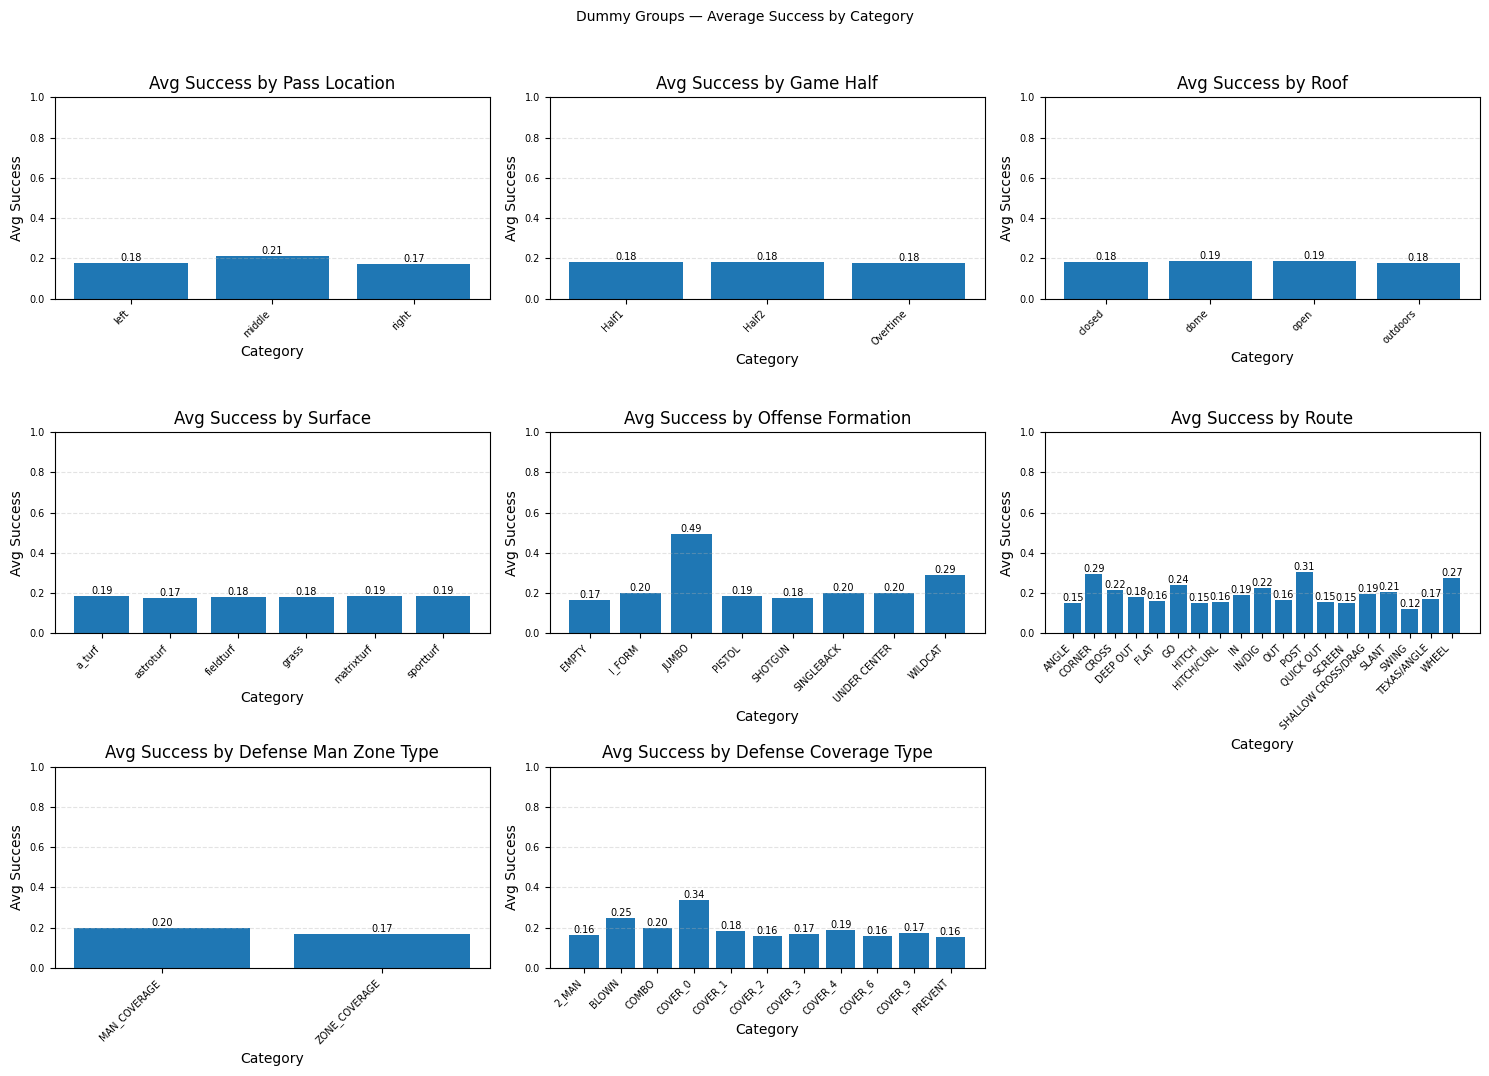

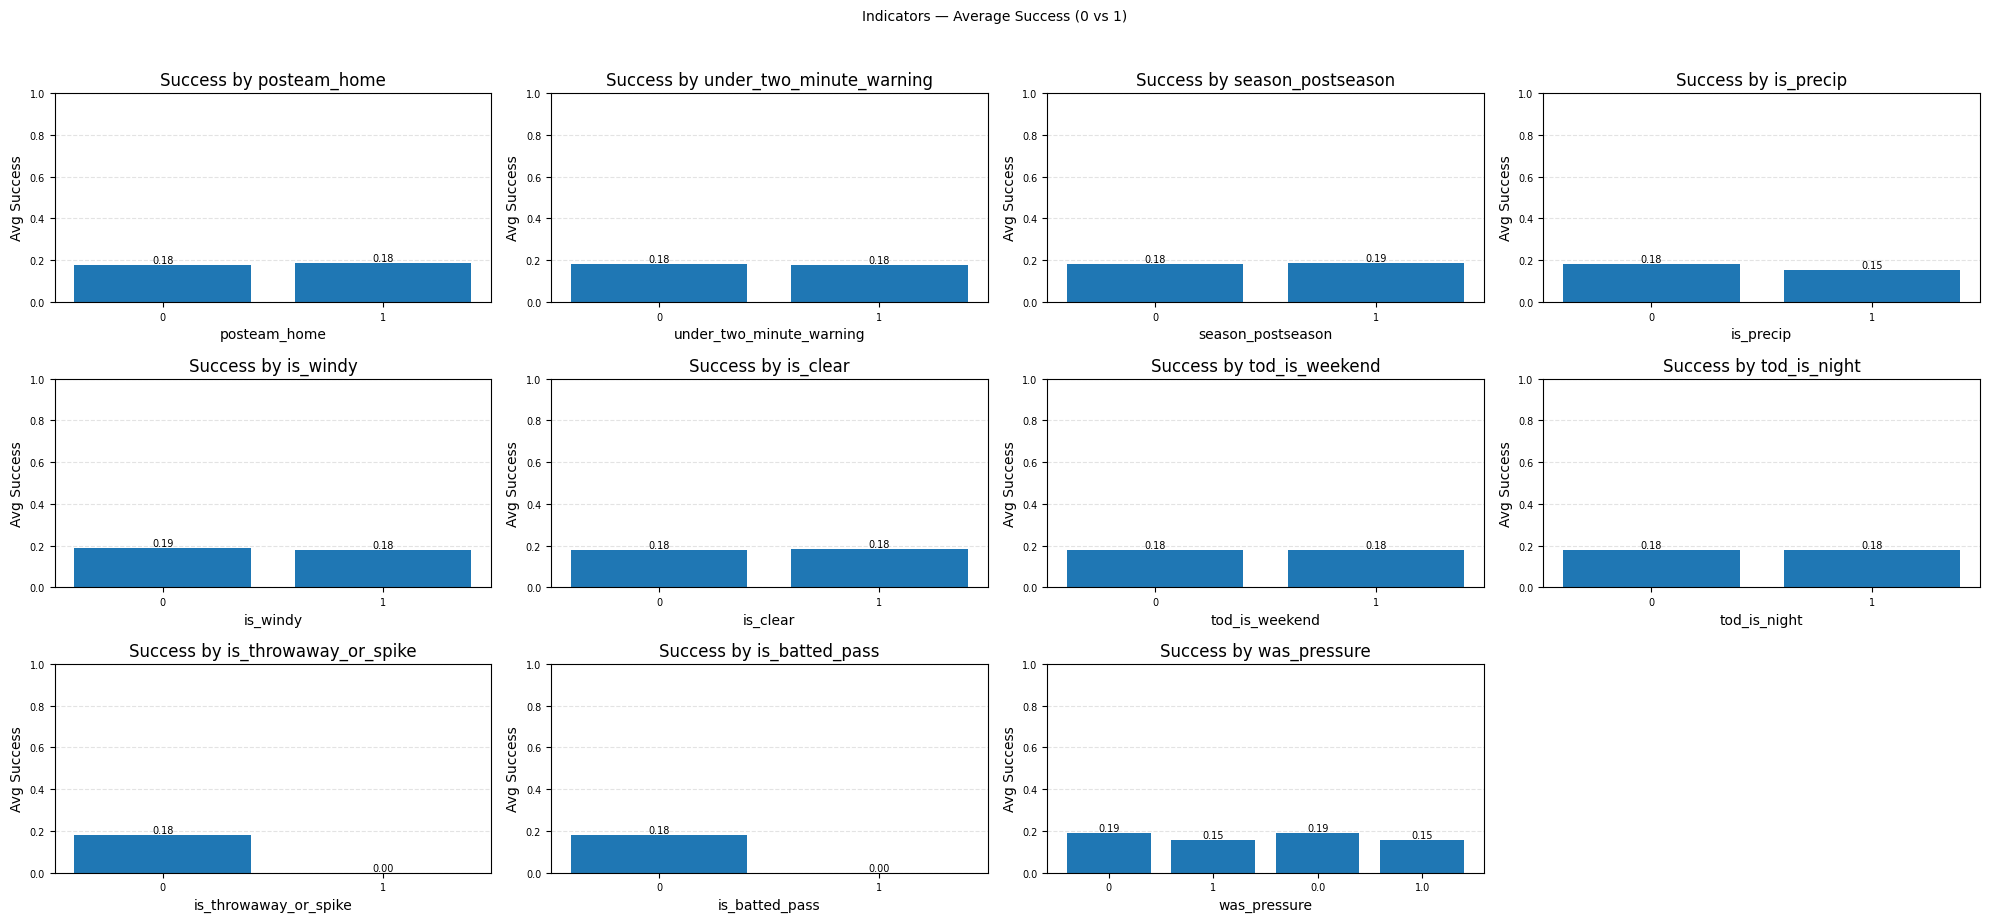

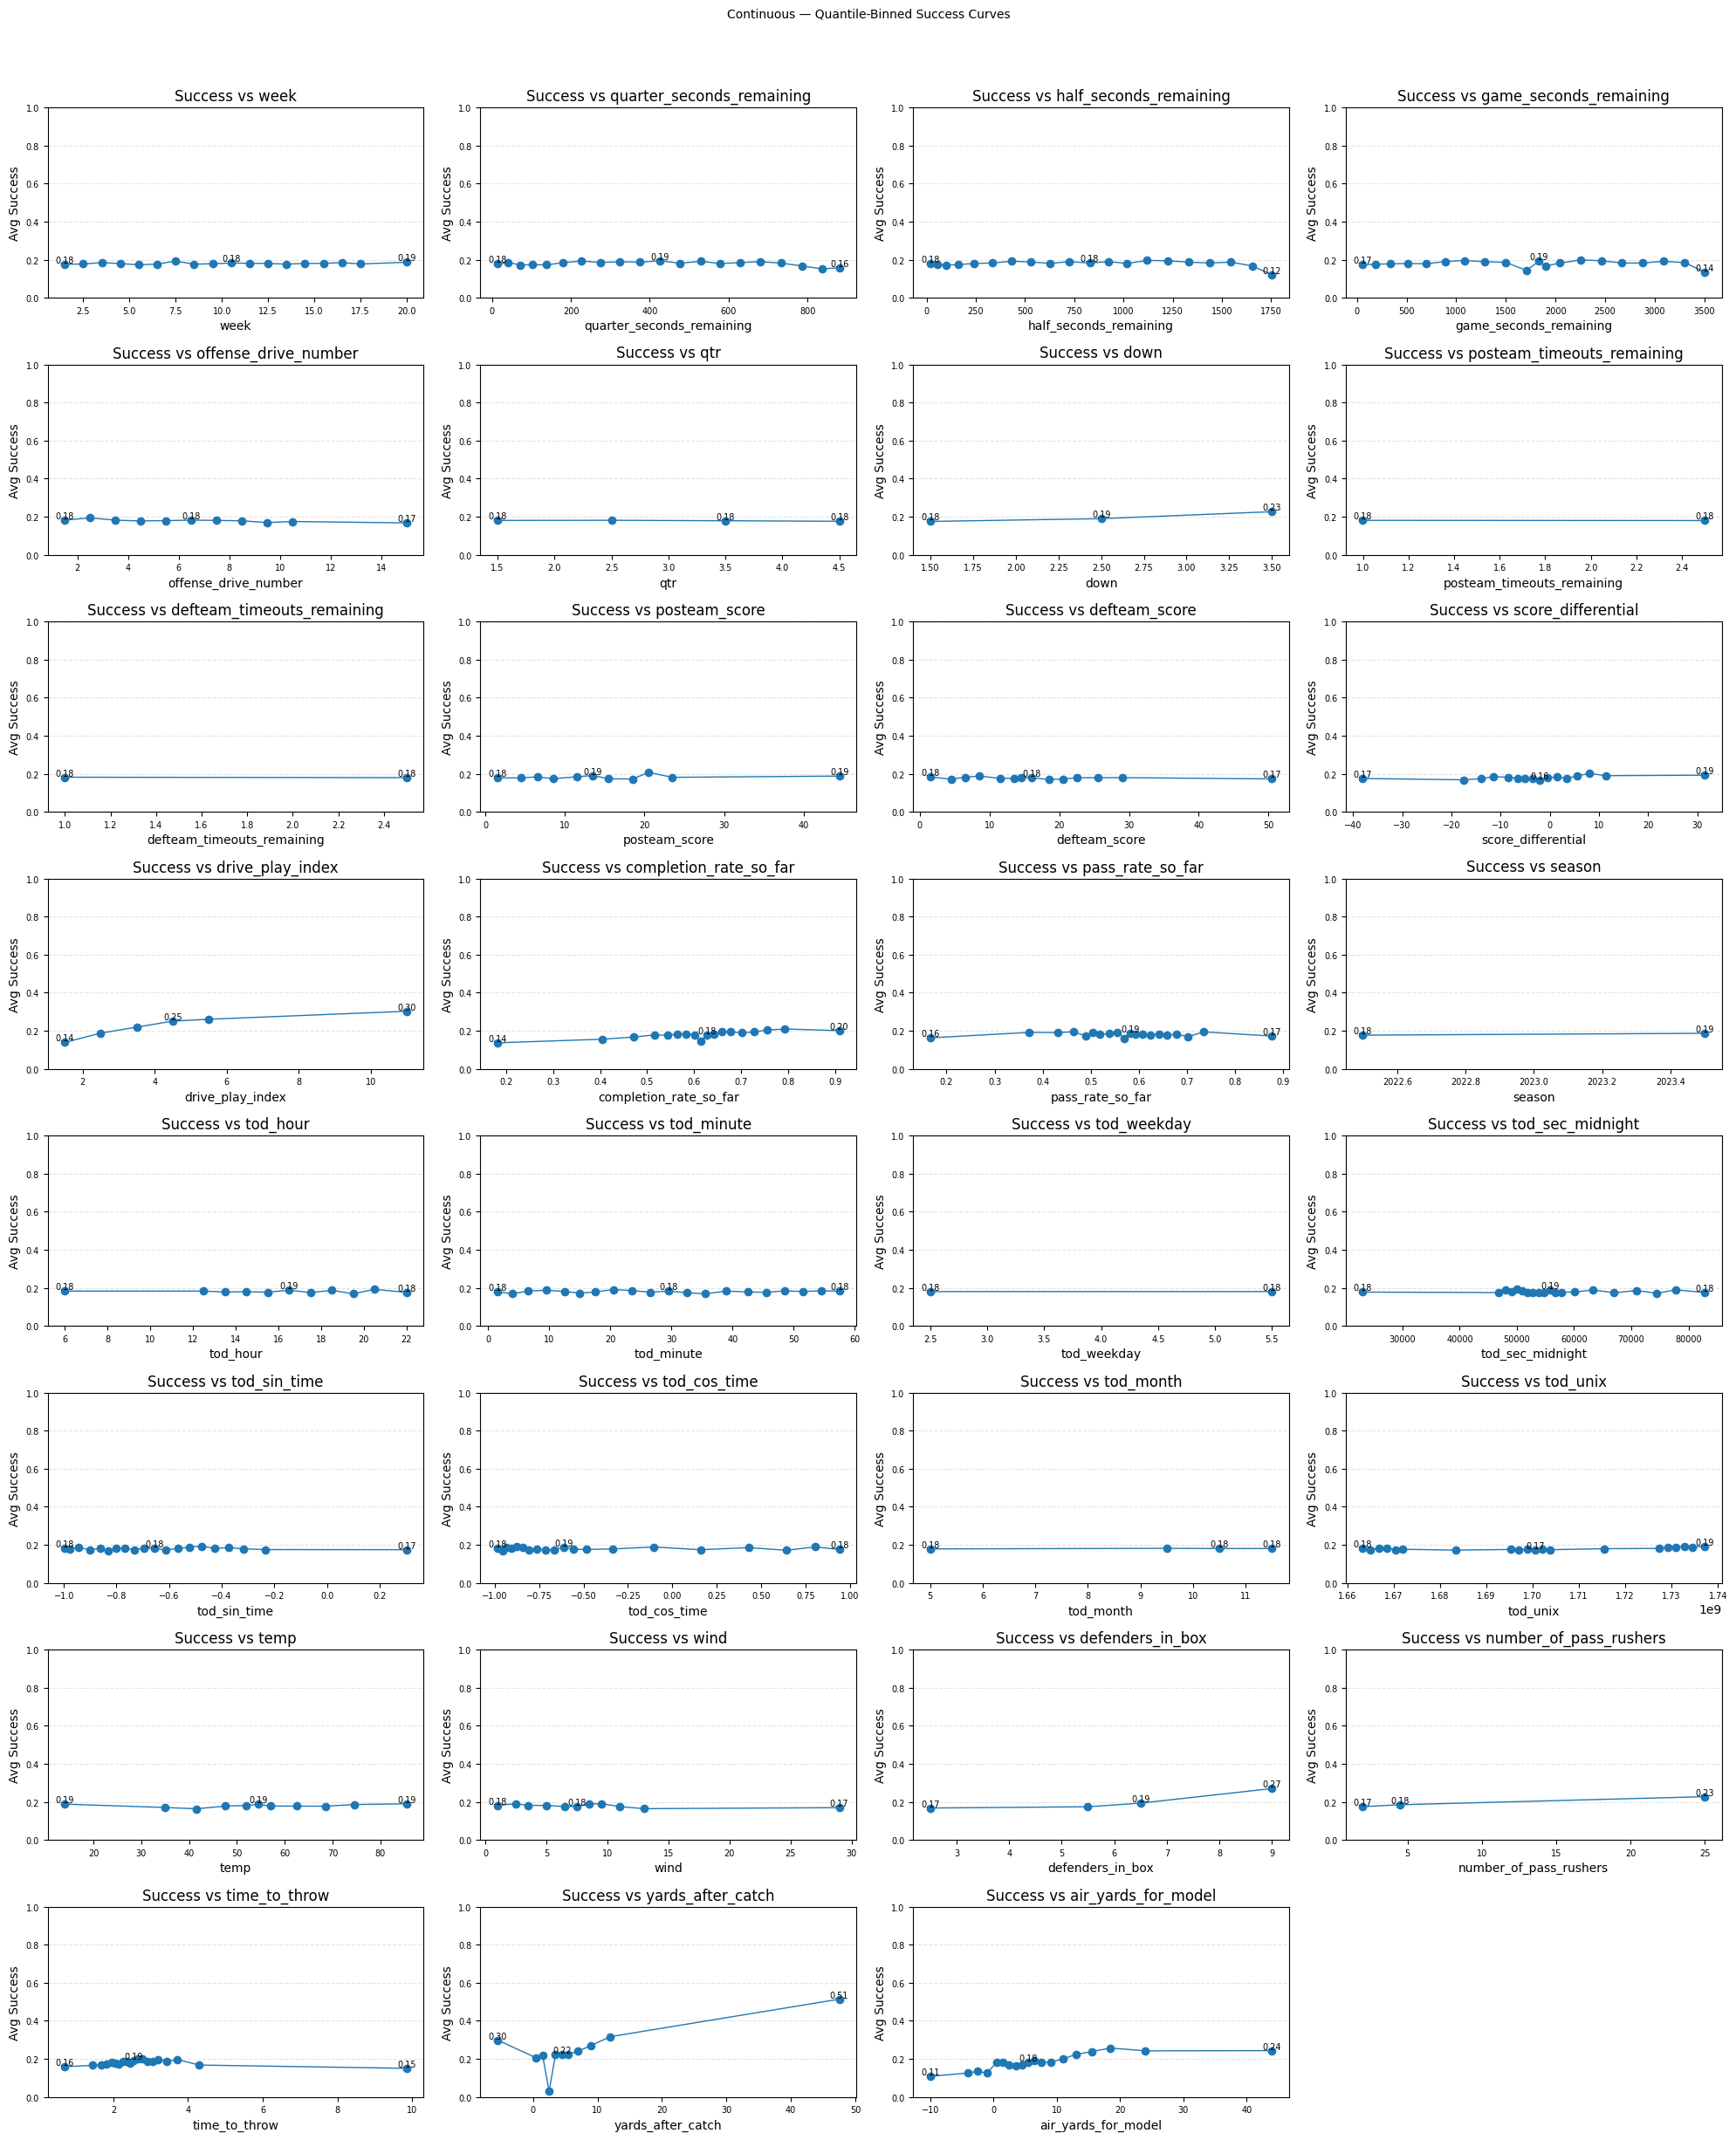

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target = 'success_outcome'

# === HARD-CODED FEATURE GROUPS ===

dummy_groups = {
    'pass_location_': ['pass_location_left', 'pass_location_middle', 'pass_location_right'],
    'game_half_': ['game_half_Half1', 'game_half_Half2', 'game_half_Overtime'],
    'roof_': ['roof_closed', 'roof_dome', 'roof_open', 'roof_outdoors'],
    'surface_': ['surface_a_turf', 'surface_astroturf', 'surface_fieldturf', 'surface_grass',
                 'surface_matrixturf', 'surface_sportturf'],
    'offense_formation_': ['offense_formation_EMPTY', 'offense_formation_I_FORM',
                           'offense_formation_JUMBO', 'offense_formation_PISTOL',
                           'offense_formation_SHOTGUN', 'offense_formation_SINGLEBACK',
                           'offense_formation_UNDER CENTER', 'offense_formation_WILDCAT'],
    'route_': ['route_ANGLE', 'route_CORNER', 'route_CROSS', 'route_DEEP OUT', 'route_FLAT',
               'route_GO', 'route_HITCH', 'route_HITCH/CURL', 'route_IN', 'route_IN/DIG',
               'route_OUT', 'route_POST', 'route_QUICK OUT', 'route_SCREEN',
               'route_SHALLOW CROSS/DRAG', 'route_SLANT', 'route_SWING', 'route_TEXAS/ANGLE',
               'route_WHEEL'],
    'defense_man_zone_type_': ['defense_man_zone_type_MAN_COVERAGE', 'defense_man_zone_type_ZONE_COVERAGE'],
    'defense_coverage_type_': ['defense_coverage_type_2_MAN', 'defense_coverage_type_BLOWN',
                               'defense_coverage_type_COMBO', 'defense_coverage_type_COVER_0',
                               'defense_coverage_type_COVER_1', 'defense_coverage_type_COVER_2',
                               'defense_coverage_type_COVER_3', 'defense_coverage_type_COVER_4',
                               'defense_coverage_type_COVER_6', 'defense_coverage_type_COVER_9',
                               'defense_coverage_type_PREVENT']
}

indicator_features = [
    'posteam_home', 'under_two_minute_warning', 'season_postseason', 'is_precip', 'is_windy',
    'is_clear', 'tod_is_weekend', 'tod_is_night', 'is_throwaway_or_spike', 'is_batted_pass', 'was_pressure'
]

continuous_features = [
    'week', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining',
    'offense_drive_number', 'qtr', 'down', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
    'posteam_score', 'defteam_score', 'score_differential', 'drive_play_index',
    'completion_rate_so_far', 'pass_rate_so_far', 'season', 'tod_hour', 'tod_minute',
    'tod_weekday', 'tod_sec_midnight', 'tod_sin_time', 'tod_cos_time', 'tod_month', 'tod_unix',
    'temp', 'wind', 'defenders_in_box', 'number_of_pass_rushers', 'time_to_throw',
    'yards_after_catch', 'air_yards_for_model', 
]
# ---------- HELPERS ----------
def annotate_bars(ax, fmt="%.2f", fontsize=7):
    """Add value labels on top of bars (works with ax.bar)."""
    for patch in ax.patches:
        height = patch.get_height()
        if np.isnan(height):
            continue
        x = patch.get_x() + patch.get_width() / 2
        ax.text(x, height, fmt % height, ha='center', va='bottom', fontsize=fontsize, rotation=0)

def small_axes(ax, title=None, xlabel=None, ylabel=None, ylim=(0,1)):
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    if ylim: ax.set_ylim(*ylim)
    ax.grid(axis='y', linestyle='--', alpha=0.35)
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

def grid_shape(n, max_cols=4):
    ncols = min(max_cols, max(1, n))
    nrows = int(np.ceil(n / ncols))
    return nrows, ncols

def safe_numeric(s):
    """Convert booleans/strings to numeric safely; coerce errors to NaN."""
    return pd.to_numeric(pd.Series(s).replace({True: 1, False: 0, 'True': 1, 'False': 0}), errors='coerce')

# ---------- 1) DUMMIES → MATRIX (one subplot per dummy prefix) ----------
if len(dummy_groups) > 0:
    nrows, ncols = grid_shape(len(dummy_groups), max_cols=3)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.5*nrows))
    axes = np.atleast_1d(axes).ravel()

    for ax, (prefix, cols) in zip(axes, dummy_groups.items()):
        # compute avg success where each dummy is active
        labels, values = [], []
        for c in cols:
            if c in df.columns:
                sub = df[df[c] == 1]
                if not sub.empty:
                    labels.append(c.replace(prefix, ''))
                    values.append(sub[target].mean())
        if labels:
            bars = ax.bar(labels, values)
            small_axes(ax,
                       title=f"Avg Success by {prefix[:-1].replace('_',' ').title()}",
                       xlabel="Category", ylabel="Avg Success", ylim=(0,1))
            ax.set_xticklabels(labels, rotation=45, ha='right')
            annotate_bars(ax, fmt="%.2f", fontsize=7)
        else:
            ax.axis('off')

    # turn off any leftover empty axes
    for i in range(len(dummy_groups), len(axes)):
        axes[i].axis('off')

    fig.suptitle("Dummy Groups — Average Success by Category", fontsize=10, y=1.02)
    fig.tight_layout()
    plt.show()

# ---------- 2) INDICATORS → MATRIX (one subplot per indicator; bars for 0/1) ----------
if len(indicator_features) > 0:
    nrows, ncols = grid_shape(len(indicator_features), max_cols=4)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.0*nrows))
    axes = np.atleast_1d(axes).ravel()

    for ax, col in zip(axes, indicator_features):
        if col in df.columns and df[col].notna().any():
            grp = df.groupby(col)[target].mean()
            # enforce order [0, 1] if present
            labels, values = [], []
            for lab in [0, 1]:
                if lab in grp.index:
                    labels.append(str(lab))
                    values.append(float(grp.loc[lab]))
            # catch non-standard binaries (e.g., True/False strings)
            for lab in grp.index:
                if str(lab) not in labels:
                    labels.append(str(lab))
                    values.append(float(grp.loc[lab]))
            ax.bar(labels, values)
            small_axes(ax, title=f"Success by {col}", xlabel=col, ylabel="Avg Success", ylim=(0,1))
            annotate_bars(ax, fmt="%.2f", fontsize=7)
        else:
            ax.axis('off')

    for i in range(len(indicator_features), len(axes)):
        axes[i].axis('off')

    fig.suptitle("Indicators — Average Success (0 vs 1)", fontsize=10, y=1.02)
    fig.tight_layout()
    plt.show()

# ---------- 3) CONTINUOUS → MATRIX (one subplot per feature; quantile-binned line) ----------
if len(continuous_features) > 0:
    nrows, ncols = grid_shape(len(continuous_features), max_cols=4)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.0*nrows))
    axes = np.atleast_1d(axes).ravel()

    for ax, col in zip(axes, continuous_features):
        if col not in df.columns:
            ax.axis('off'); continue

        s = safe_numeric(df[col])
        y = safe_numeric(df[target])
        valid = s.notna() & y.notna()
        s, y = s[valid], y[valid]
        if s.empty:
            ax.axis('off'); continue

        # quantile bins for smooth curve
        try:
            q = min(20, max(3, s.nunique()))
            bins = pd.qcut(s, q=q, duplicates='drop')
        except ValueError:
            ax.axis('off'); continue

        avg_success = y.groupby(bins).mean()
        centers = [(iv.left + iv.right) / 2 for iv in avg_success.index.categories]

        ax.plot(centers, avg_success.values, marker='o', linewidth=1)
        small_axes(ax, title=f"Success vs {col}", xlabel=col, ylabel="Avg Success", ylim=(0,1))

        # optional: label a few points (start/mid/end) to avoid clutter
        if len(centers) >= 3:
            idxs = [0, len(centers)//2, len(centers)-1]
        else:
            idxs = range(len(centers))
        for i in idxs:
            ax.text(centers[i], avg_success.values[i],
                    f"{avg_success.values[i]:.2f}",
                    ha='center', va='bottom', fontsize=7)

    for i in range(len(continuous_features), len(axes)):
        axes[i].axis('off')

    fig.suptitle("Continuous — Quantile-Binned Success Curves", fontsize=10, y=1.02)
    fig.tight_layout()
    plt.show()

# Check for Multicolinearity

In [84]:
#CHECKS FOR MISSING VALS FIRST
print(f"Checking missing values among {len(X)} modeling features...\n")

# 1️⃣  Show missing-value rates in X columns
missing_in_X = df[X].isna().mean().sort_values(ascending=False)
if missing_in_X.any():
    print("Top missing rates in X:\n")
    print(missing_in_X[missing_in_X > 0].head(20))
else:
    print("No missing values in your X features!")

# 2️⃣  Fill missing numeric columns with their median
numeric_X = [c for c in X if np.issubdtype(df[c].dtype, np.number)]

print(f"\nImputing missing numeric features (median strategy)... ({len(numeric_X)} numeric columns)")
df[numeric_X] = df[numeric_X].fillna(df[numeric_X].median())

# 3️⃣  Optional: sanity check — confirm no NaNs remain
remaining_nans = df[X].isna().sum().sum()
if remaining_nans == 0:
    print("\n✅ All missing values in your X features have been filled.")
else:
    print(f"\n⚠️ There are still {remaining_nans} missing values left in X — check non-numeric columns or encoding issues.")

# 4️⃣  Optional: visualize the worst offenders (if any remain)
if remaining_nans > 0:
    still_missing = df[X].isna().mean().sort_values(ascending=False)
    print("\nColumns still missing:\n", still_missing[still_missing > 0].head(10))

Checking missing values among 148 modeling features...

No missing values in your X features!

Imputing missing numeric features (median strategy)... (148 numeric columns)

✅ All missing values in your X features have been filled.


In [85]:
# ===== Robust VIF with Diagnostics (X and y only) =====
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

TARGET = 'success_outcome'  # or whatever y column name you’re using

# Adjust to match your one-hot prefixes
DUMMY_PREFIXES = [
    'pass_location_', 'game_half_', 'roof_', 'surface_', 'offense_formation_',
    'route_', 'defense_man_zone_type_', 'defense_coverage_type_'
]

def _drop_dummy_baselines_for_vif(X_df, prefixes):
    to_drop = []
    for pref in prefixes:
        cols = [c for c in X_df.columns if c.startswith(pref)]
        if len(cols) > 1:
            # drop a stable baseline (first in sorted order)
            to_drop.append(sorted(cols)[0])
    return X_df.drop(columns=to_drop, errors='ignore')

def compute_vif_with_diagnostics_X(df, X_cols, target=TARGET, dummy_prefixes=DUMMY_PREFIXES, max_rows=None):
    """Compute VIF only on the user-specified X feature list."""
    
    # 1️⃣ Restrict to X columns only
    X = df[X_cols].copy()
    
    # 2️⃣ Keep only numeric features (VIF only works on numeric)
    X = X.select_dtypes(include=[np.number])
    print(f"[VIF] Using {X.shape[1]} numeric features from your X list")

    # 3️⃣ Convert booleans to 0/1
    for c in X.columns:
        if X[c].dtype == bool:
            X[c] = X[c].astype(int)

    # 4️⃣ Handle missing / inf values
    n_total = int(np.prod(X.shape)) if X.size else 0
    n_nan = int(X.isna().sum().sum())
    n_inf = int(np.isinf(X.to_numpy()).sum()) if X.size else 0
    print(f"[VIF] total={n_total} | NaNs={n_nan} | Infs={n_inf}")
    X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median(numeric_only=True))

    # 5️⃣ Drop constants
    nunique = X.nunique(dropna=False)
    const_cols = nunique[nunique <= 1].index.tolist()
    if const_cols:
        print(f"[VIF] Dropping {len(const_cols)} constant columns")
        X = X.drop(columns=const_cols)

    # 6️⃣ Drop one baseline per dummy prefix
    X = _drop_dummy_baselines_for_vif(X, dummy_prefixes)
    print(f"[VIF] {X.shape[1]} columns remain after baseline drop")

    # 7️⃣ Downsample rows (optional)
    if max_rows and X.shape[0] > max_rows:
        X = X.sample(n=max_rows, random_state=42)

    # 8️⃣ Compute VIF
    print(f"[VIF] Computing on {X.shape[0]} rows × {X.shape[1]} cols")
    arr = X.values
    vif_vals = [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]
    vif_df = pd.DataFrame({'feature': X.columns, 'VIF': vif_vals}).sort_values('VIF', ascending=False)
    
    print("\nTop VIF values:")
    print(vif_df.head(25).to_string(index=False))
    
    # 9️⃣ Optional: flag highly collinear features
    high_vif = vif_df[vif_df['VIF'] > 10]
    if not high_vif.empty:
        print("\n⚠️ High multicollinearity detected:")
        print(high_vif.to_string(index=False))
    else:
        print("\n✅ No severe multicollinearity (VIF > 10) detected.")
    
    return vif_df

# ---- RUN IT ----
vif_report = compute_vif_with_diagnostics_X(df, X_cols=X, target='success_outcome')


[VIF] Using 148 numeric features from your X list
[VIF] total=8207192 | NaNs=0 | Infs=0
[VIF] 140 columns remain after baseline drop
[VIF] Computing on 55454 rows × 140 cols


/Users/johnburzawa/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide




Top VIF values:
                            feature          VIF
                 score_differential          inf
                      posteam_score          inf
      defense_coverage_type_COVER_9          inf
defense_man_zone_type_ZONE_COVERAGE          inf
                      defteam_score          inf
      defense_coverage_type_COVER_6 1.501200e+15
      defense_coverage_type_COVER_4 6.928615e+14
        defense_coverage_type_BLOWN 4.503600e+14
      defense_coverage_type_COVER_2 1.668000e+14
                    game_half_Half2 1.501200e+14
      defense_coverage_type_COVER_3 4.691250e+13
        defense_coverage_type_COMBO 3.865751e+13
      defense_coverage_type_PREVENT 1.288584e+13
                 game_half_Overtime 1.017763e+13
             half_seconds_remaining 3.418292e+12
             game_seconds_remaining 1.516415e+11
                                qtr 8.306313e+10
          quarter_seconds_remaining 6.164505e+09
                           tod_hour 3.823361e+05
   

In [86]:
# Columns you want to remove from X (not from df)
drop_cols = [
    'posteam_score', 'defteam_score',             # redundant with score_differential
    'half_seconds_remaining', 'quarter_seconds_remaining',  # redundant with game_seconds_remaining
    'defense_man_zone_type_ZONE_COVERAGE',        # drop one as baseline
]

# Filter X to exclude those
X = [c for c in X if c not in drop_cols]

# Sanity check
print(f"✅ Updated X feature count: {len(X)}")
print("Dropped columns:", drop_cols)
print("Remaining sample features:", X[:10])

✅ Updated X feature count: 143
Dropped columns: ['posteam_score', 'defteam_score', 'half_seconds_remaining', 'quarter_seconds_remaining', 'defense_man_zone_type_ZONE_COVERAGE']
Remaining sample features: ['posteam_home', 'under_two_minute_warning', 'season_postseason', 'week', 'game_seconds_remaining', 'offense_drive_number', 'qtr', 'down', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining']


In [87]:
# ✅ Define a clean modeling DataFrame
y_col = 'success_outcome'
model_df = df[X + [y_col]].copy()

# ✅ Sanity checks
print("model_df shape:", model_df.shape)
print("Number of features (X):", len(X))
print("Target:", y_col)
print("Missing values:", model_df.isna().sum().sum())

# ✅ (Optional) preview
model_df.head()

model_df shape: (55454, 144)
Number of features (X): 143
Target: success_outcome
Missing values: 0


,posteam_home,under_two_minute_warning,season_postseason,week,game_seconds_remaining,offense_drive_number,qtr,down,posteam_timeouts_remaining,defteam_timeouts_remaining,...,defense_coverage_type_COVER_6,defense_coverage_type_COVER_9,defense_coverage_type_PREVENT,yards_after_catch_missing,completion_rate_so_far_missing,pass_rate_so_far_missing,time_to_throw_missing,was_pressure_missing,number_of_pass_rushers_missing,success_outcome
0,1,0,0,1,3569.0,1.0,1.0,1.0,3.0,3.0,...,0,0,0,1,1,0,0,0,0,0.000000
1,1,0,0,1,3541.0,1.0,1.0,3.0,3.0,3.0,...,0,0,0,1,0,0,0,0,0,0.000000
2,0,0,0,1,3522.0,1.0,1.0,1.0,3.0,3.0,...,0,0,0,0,1,1,0,0,0,0.055556
3,0,0,0,1,3501.0,1.0,1.0,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0.058824
4,0,0,0,1,3379.0,1.0,1.0,2.0,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0.133333


In [89]:
# inspect the top correlated features with your target
corr_with_target = model_df[X + ['success_outcome']].corr(numeric_only=True)['success_outcome'].sort_values(ascending=False)
corr_with_target.head(15)

success_outcome                       1.000000
yards_after_catch                     0.308797
drive_play_index                      0.200285
air_yards_for_model                   0.143597
defense_coverage_type_COVER_0         0.124326
route_POST                            0.101591
route_CORNER                          0.087045
defenders_in_box                      0.076265
route_GO                              0.069748
pass_location_middle                  0.063397
completion_rate_so_far                0.061237
defense_man_zone_type_MAN_COVERAGE    0.055412
first_down_pass_so_far                0.052846
number_of_pass_rushers                0.047694
route_IN/DIG                          0.042938
Name: success_outcome, dtype: float64

In [90]:
# Confirm all X columns exist
missing_cols = [c for c in X if c not in df.columns]
if missing_cols:
    print(f"⚠️ Missing columns in df: {missing_cols}")
else:
    print("✅ All X features exist in df")

# Check for NaNs or inf values
import numpy as np
nan_count = df[X].isna().sum().sum()
inf_count = np.isinf(df[X].to_numpy()).sum()
print(f"NaNs: {nan_count:,}, Infs: {inf_count:,}")

✅ All X features exist in df
NaNs: 0, Infs: 0


In [95]:
pd.set_option('display.max_rows', None)      # show all rows
pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.width', 0)            # auto-detect width
pd.set_option('display.max_colwidth', None)  # don't truncate column names or values
pd.set_option('display.float_format', '{:.4f}'.format)  # nicer numeric precision
summary = model_df[X].describe(percentiles=[.01, .5, .99]).T[['mean', 'std', 'min', '1%', '99%', 'max']]
display(summary)

,mean,std,min,1%,99%,max
posteam_home,0.5024,0.5000,0.0000,0.0000,1.0000,1.0000
under_two_minute_warning,0.1411,0.3481,0.0000,0.0000,1.0000,1.0000
season_postseason,0.0467,0.2110,0.0000,0.0000,1.0000,1.0000
week,9.9318,5.6025,1.0000,1.0000,21.0000,22.0000
game_seconds_remaining,1710.3721,1042.3664,0.0000,27.0000,3566.0000,3600.0000
offense_drive_number,5.9443,3.3125,1.0000,1.0000,13.0000,19.0000
qtr,2.5674,1.1229,1.0000,1.0000,4.0000,5.0000
down,1.9317,0.8482,1.0000,1.0000,4.0000,4.0000
posteam_timeouts_remaining,2.5583,0.8029,0.0000,0.0000,3.0000,3.0000
defteam_timeouts_remaining,2.6369,0.6654,0.0000,0.0000,3.0000,3.0000


In [98]:
import pandas as pd
import numpy as np

# --- config ---
y_col = 'success_outcome'
cutoff = pd.Timestamp('2023-01-01')   # adjust if needed

# --- pick or build a date column INSIDE model_df ---
date_col = None
work = model_df.copy()

if 'game_date' in work.columns:
    # try to parse real game_date
    work['game_date'] = pd.to_datetime(work['game_date'], errors='coerce', utc=False, infer_datetime_format=True)
    parsed_ok = work['game_date'].notna().sum()
    parsed_bad = work['game_date'].isna().sum()
    print(f"[model_df] game_date parsed OK: {parsed_ok:,}  |  NaT: {parsed_bad:,}")
    if parsed_ok > 0:
        date_col = 'game_date'

# build a surrogate if needed
if date_col is None:
    # require season + week to exist (both are in your X list)
    if not {'season','week'}.issubset(work.columns):
        raise KeyError("Need either 'game_date' or both 'season' and 'week' in model_df to make a temporal split.")
    print("[model_df] Using surrogate date from season + week...")
    base = pd.to_datetime(work['season'].astype(str) + "-09-01", errors='coerce')  # approx season start
    work['__surrogate_date__'] = base + pd.to_timedelta((work['week'].fillna(1).astype(int) - 1), unit='W')
    date_col = '__surrogate_date__'

# --- drop rows without a usable date for the split ---
before = len(work)
work = work.dropna(subset=[date_col]).copy()
dropped = before - len(work)
if dropped:
    print(f"[split] Dropped {dropped:,} rows with NaT in {date_col} for temporal split.")

# --- sort & split ---
work = work.sort_values([date_col]).reset_index(drop=True)

train = work[work[date_col] < cutoff].copy()
test  = work[work[date_col] >= cutoff].copy()

print(f"Train shape: {train.shape} | Test shape: {test.shape}")
print(f"Train {date_col} range: {train[date_col].min()} → {train[date_col].max()}")
print(f"Test  {date_col} range: {test[date_col].min()}  → {test[date_col].max()}")

# --- split into X/y using ONLY columns in model_df ---
X_cols = [c for c in work.columns if c != y_col and c != date_col]

train_X = train[X_cols].copy()
train_y = train[y_col].copy().astype(int if train[y_col].dropna().isin([0,1]).all() else train[y_col].dtype)

test_X  = test[X_cols].copy()
test_y  = test[y_col].copy().astype(int if test[y_col].dropna().isin([0,1]).all() else test[y_col].dtype)

print(f"\nFeatures used (X): {len(X_cols)}")
print(f"train_X: {train_X.shape}, train_y: {train_y.shape}")
print(f"test_X:  {test_X.shape},  test_y:  {test_y.shape}")

[model_df] Using surrogate date from season + week...
Train shape: (17623, 145) | Test shape: (37831, 145)
Train __surrogate_date__ range: 2022-09-01 00:00:00 → 2022-12-29 00:00:00
Test  __surrogate_date__ range: 2023-01-05 00:00:00  → 2025-01-26 00:00:00

Features used (X): 143
train_X: (17623, 143), train_y: (17623,)
test_X:  (37831, 143),  test_y:  (37831,)


In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- instantiate the model (regression) ---
rf = RandomForestRegressor(
    n_estimators=300,      # a bit larger for smoother preds
    random_state=42,
    n_jobs=-1,
    max_depth=None,       # let trees grow; tune later
)

# --- fit on training data from model_df ---
rf.fit(train_X, train_y.astype(float))

# --- predict on test data ---
preds = rf.predict(test_X)

# (Optional) if your target is a probability in [0,1], clip to bounds:
# preds = np.clip(preds, 0.0, 1.0)

# --- regression metrics ---
mae  = mean_absolute_error(test_y, preds)
mse  = mean_squared_error(test_y, preds)
rmse = np.sqrt(mse)
r2   = r2_score(test_y, preds)

print("=== Random Forest (Regression) Baseline ===")
print(f"MAE : {mae:0.4f}")
print(f"RMSE: {rmse:0.4f}")
print(f"R²  : {r2:0.4f}")

=== Random Forest (Regression) Baseline ===
MAE : 0.0890
RMSE: 0.1522
R²  : 0.6436


In [101]:
model_df.to_csv('modeling_dataframe.csv', index=False)